<a href="https://colab.research.google.com/github/ddannybb25/project/blob/main/s2project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##프로젝트 목표##

토스, 카카오 뱅크등 인터넷 전문 은행, 핀테크 기업 등 새로운 경쟁사들이 빠르게 성장하면서  

저희 국민은행은 예금 예치할 고객을 늘리고자 합니다. 

따라서 이번 프로젝트 목표는 다음과 같습니다. 
 

목표 1) 예금 예치여부를 잘 분류하는 모델 생성

목표1의 기대효과 ) 고객의 예금 예치여부를 미리 파악하고 예금예치하지 않을 것 같은 고객을 파악하여 각 요소들을 장려하여 예금 예치를 시키고자 함  

목표 2 ) 예금 예치에 가장 중요한 영향을 끼치는 요소 파악

목표2의 기대효과 ) 예금 예치를 수락한 고객은 다음 마케팅에 호의적인 반응을 보일 수 있기에 우선적으로 타켓팅에 대상으로 삼아 비즈니스적으로 홍보비용 감축 가능 , 또한 다음 마케팅 캠페인 계획수립에 반영하고자 함 




가설 


- 예금 예치승락에 가장 중요한 영향을 끼치는 요소는 무엇일까?

1. 직업과 잔액이 예금예치승락에 가장 중요한 영향을 끼칠 것이다. 
2. 지난번 마케팅 캠페인의 결과는 이번 마케팅 캠페인에 가장 큰 영향을 끼칠 것이다. 


데이터셋: 텔레마케팅 한 데이터로 지난번 마케팅 캠페인의 결과도 반영되어 있음

타겟설정:  예금을 예치하나? 안하나? 이진분류  

### **Bank client data:**

- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown') 신용정지
- balance: bank balance
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### **Related with the last contact of the current campaign:**

- Contact: contact communication type (categorical:'cellular'(핸드폰),'telephone'(유선전화))
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec') 마지막 연락한 달 
- Day: last contact day  마지막 연락한 날
- Duration: last contact duration, in seconds (numeric). 연락한 기간 

### **Other attributes:**

- Campaign: number of contacts performed during this campaign and forthis client (numeric, includes last contact)
이 캠페인 하는 동안 접촉횟수
- Pdays: number of days that passed by after the client was lastcontacted from a previous campaign (numeric; -1 means client was notpreviously contacted)
이전 캠페인으로부터 고객이 마지막 연락한 이후로 얼마나 지났는지 
- Previous: number of contacts performed before this campaign and forthis client (numeric)
전 캠페인 연락횟수 
- Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')
전 캠페인 결과 
### **Output variable (desired target):**

- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [ ]:
import pandas as pd
df=pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


전처리, EDA,시각화

In [ ]:
df.isnull().sum() #결측치 확인 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df.duplicated().sum() #중복값 확인 

0

In [ ]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


나이는 가장 어린 나이는 18세이며 가장 많은 나이는 95세이다. 





In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day          object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

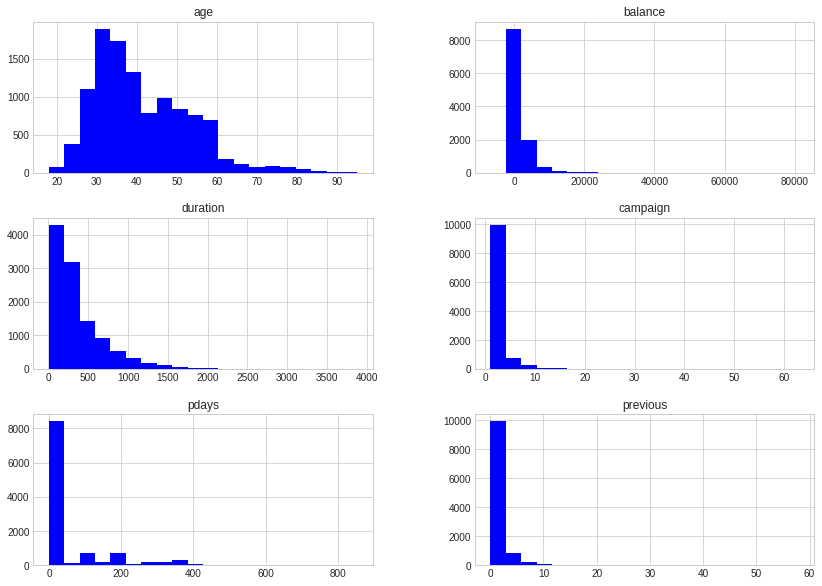

In [ ]:
#수치형 자료에 대한 eda
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='blue')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


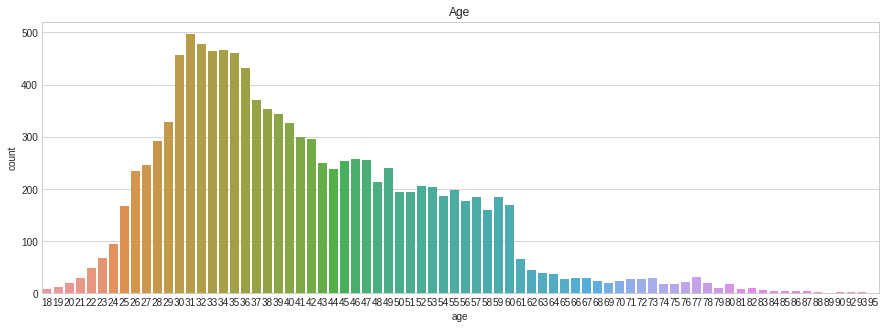

In [ ]:
import seaborn as sns

plt.figure(figsize =(15 ,5))
plt.title('Age')
sns.countplot(df['age'])

In [ ]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


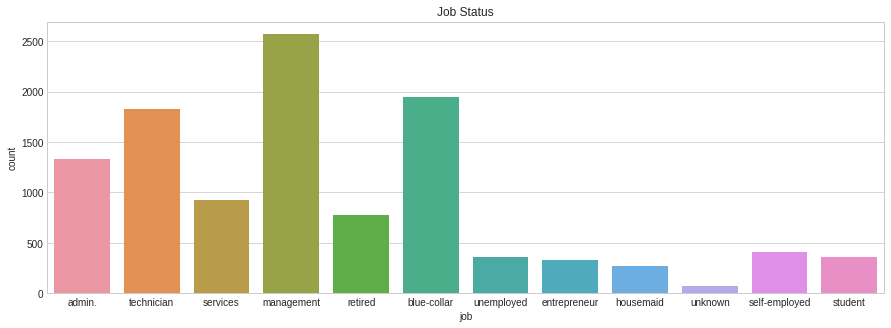

In [ ]:
plt.figure(figsize =(15 ,5))
plt.title('Job Status')
sns.countplot(df['job'])

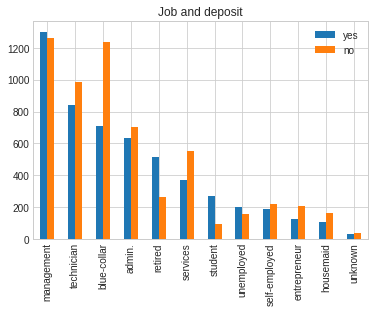

In [ ]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')


예금 yes > no : 예금을 한 정도가 더 큰 경우 

management,retired,student,unemployed

management관리직일 경우 예금을 한 정도가 크긴 하나 안한 정도와 차이가 작다.

retired 은퇴한 경우 예금한 정도가 안한 정도보다 훨씬 크다. 

의외로 student 학생과 unemployed 무직자의 경우 예금한 정도가 높음을 알 수 있다. 

예금 yes < no : 예금을 안 한 정도가 더 큰 경우

technician,blue-collar,admin,services,self_employed,entrepreneur,housemaid

technician 기술직일 경우 예금을 안한 정도가 더 높다.

blue-collar 일 경우 예금을 거절한 정도가 눈에 뛰게 높다.

services의 경우도 예금을 거절한 정도가 눈에 뛰게 높다. 

In [ ]:
df.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

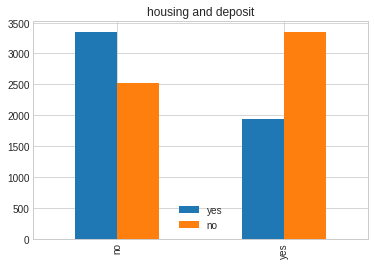

In [ ]:
h_df = pd.DataFrame()

h_df['yes'] = df[df['deposit'] == 'yes']['housing'].value_counts()
h_df['no'] = df[df['deposit'] == 'no']['housing'].value_counts()

h_df.plot.bar(title = 'housing and deposit')

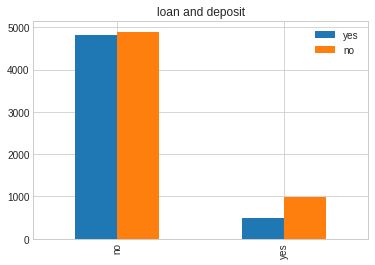

In [ ]:
l_df = pd.DataFrame()

l_df['yes'] = df[df['deposit'] == 'yes']['loan'].value_counts()
l_df['no'] = df[df['deposit'] == 'no']['loan'].value_counts()

l_df.plot.bar(title = 'loan and deposit')

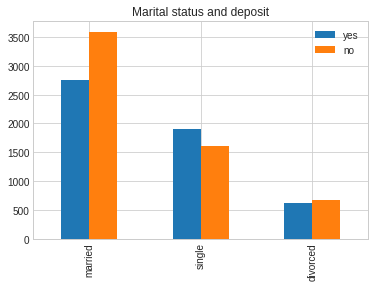

In [ ]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')



결혼한 사람은 예금거절이 수락보다 크고

가정이 없는 사람(single)일 경우 예금수락 한 정도가 크다. 


In [ ]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

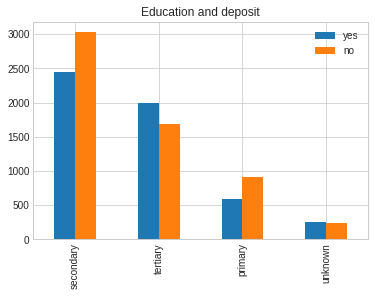

In [ ]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

In [ ]:
df.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

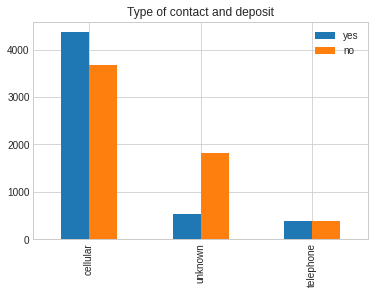

In [ ]:
j_df = pd.DataFrame()

j_df['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

In [ ]:
df.balance.value_counts()

 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dtype: int64

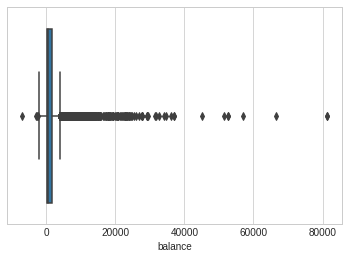

In [ ]:
sns.boxplot(x=df.balance); # 잔액이 많은 사람이 있음. 

In [ ]:
df['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [ ]:
#데이터 리키지로 삭제
df=df.drop(columns = ['duration'])
df
#duration은 마지막 연락기간을 의미함으로 통화 여부에 따라서 예금 예치승락에 영향을 줄 수 있는 값이기 때문에 삭제

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no


In [ ]:
#하이카디널리티를 가지는 특성 제거,단지 특정 날짜보다는 특정 월이 더 중요한 특성으로 생각되기에 삭제
df=df.drop(columns = ['day']) 
df

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,apr,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,jun,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,aug,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,may,2,172,5,failure,no


In [ ]:
df=df.drop(index=df[df['job']=='unknown'].index)  #직업 unknown 삭제 #가설 1을 따져볼 때 중요한 요소이고 알지못하면 다음 마케팅 수립에도 별로 도움이 되지 않는 정보
df

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,apr,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,jun,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,aug,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,may,2,172,5,failure,no


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11087,33,blue-collar,single,primary,no,1,yes,no,cellular,apr,1,-1,0,unknown,no
11088,39,services,married,secondary,no,733,no,no,unknown,jun,4,-1,0,unknown,no
11089,32,technician,single,secondary,no,29,no,no,cellular,aug,2,-1,0,unknown,no
11090,43,technician,married,secondary,no,0,no,yes,cellular,may,2,172,5,failure,no


모델링 

In [ ]:
df=df.replace(['yes','no'],[1,0]) #예금 승락yes는 1로, 거부면 0  

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,may,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,may,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,may,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,may,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,may,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11087,33,blue-collar,single,primary,0,1,1,0,cellular,apr,1,-1,0,unknown,0
11088,39,services,married,secondary,0,733,0,0,unknown,jun,4,-1,0,unknown,0
11089,32,technician,single,secondary,0,29,0,0,cellular,aug,2,-1,0,unknown,0
11090,43,technician,married,secondary,0,0,0,1,cellular,may,2,172,5,failure,0


In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
month        object
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object

In [ ]:
df #사용할 데이터 

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11087,33,blue-collar,single,primary,no,1,yes,no,cellular,apr,1,-1,0,unknown,no
11088,39,services,married,secondary,no,733,no,no,unknown,jun,4,-1,0,unknown,no
11089,32,technician,single,secondary,no,29,no,no,cellular,aug,2,-1,0,unknown,no
11090,43,technician,married,secondary,no,0,no,yes,cellular,may,2,172,5,failure,no


In [ ]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,random_state=2,test_size=0.2)

train,val=train_test_split(train,random_state=2)

print(train.shape, val.shape, test.shape)

(6654, 15) (2219, 15) (2219, 15)


In [ ]:
target = 'deposit'
features = df.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test=test[features]
y_test=test[target]

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((6654, 14), (6654,), (2219, 14), (2219,), (2219, 14), (2219,))

In [ ]:
#분류문제 풀기전 항상 타겟범주 비율 확인 
target ='deposit'
y_train=train[target]
y_train.value_counts(normalize=True)

0    0.526751
1    0.473249
Name: deposit, dtype: float64

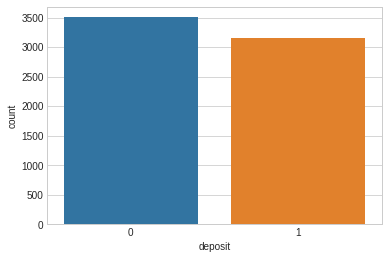

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [ ]:
#기준모델

major=y_train.mode()[0]
y_pred=[major]*len(y_train)

#훈련데이터 정확도
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

#검증데이터 정확도
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

training accuracy:  0.5267508265704839
validation accuracy:  0.5286164939161785


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 859 kB/s 


In [ ]:
#로지스틱 회귀 
from category_encoders import OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve 
import numpy as np

In [ ]:
#로지스틱 회귀
pipe = make_pipeline(
    OrdinalEncoder(), 
    StandardScaler(), 
    LogisticRegression(n_jobs=-1)
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)



In [ ]:

def show_result(my_pipe, X_data = X_val, y_data = y_val):

    y_pred = pipe.predict(X_data)

    print('Precision Score: ',precision_score(y_data, y_pred)) 
    print('Recall Score: ',recall_score(y_data, y_pred))
    print('F1 Score:',f1_score(y_data, y_pred))
    print('Accuracy Score:',accuracy_score(y_data, y_pred))
    
    y_pred_proba = pipe.predict_proba(X_data)[:,-1]
    print('AUC Score:', roc_auc_score(y_data, y_pred_proba))

In [ ]:
#로지스틱 회귀 결과 
show_result(pipe)

#auc score가 0.7232로 가장 높음 

Precision Score:  0.6517175572519084
Recall Score:  0.652963671128107
F1 Score: 0.6523400191021969
Accuracy Score: 0.6719242902208202
AUC Score: 0.7232007941592133


In [ ]:
#랜덤포레스트
from category_encoders import OneHotEncoder,OrdinalEncoder  
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline


rfpipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=7, random_state=2, oob_score=True)
)

rfpipe.fit(X_train, y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'contact',
                                      'month', 'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': management        1
admin.            2
unemployed        3
retired           4
technician        5
entrepreneur      6
blue-collar       7
housemaid         8
services          9
student          10
self-employed    11
NaN              -2
dtype: int64},
                                         {'col': 'marital',
                                          'data_type': dtype('O'),
                                          'mapping...
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': may     1
jul     2
nov     3
jan     4
aug     5
dec     6
feb     7
apr    

In [ ]:
def show_result(my_pipe, X_data = X_val, y_data = y_val):
   
    y_pred = rfpipe.predict(X_data)
    print('Precision Score: ',precision_score(y_data, y_pred)) 
    print('Recall Score: ',recall_score(y_data, y_pred))
    print('F1 Score:',f1_score(y_data, y_pred))
    print('Accuracy Score:',accuracy_score(y_data, y_pred))
    
    y_pred_proba = rfpipe.predict_proba(X_data)[:,-1]
    print('AUC Score:', roc_auc_score(y_data, y_pred_proba))

In [ ]:
#랜덤포레스트 역시 auc점수가 가장 높음 
show_result(rfpipe)   

Precision Score:  0.7601522842639594
Recall Score:  0.5726577437858509
F1 Score: 0.653217011995638
Accuracy Score: 0.7133844073907165
AUC Score: 0.7572272237517502


**랜덤 포레스트 하이퍼파라미터 튜닝 및 비교**

첫번째 랜덤포레스트 / AUC Score: 0.7572 / max_depth= 7

RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=7, random_state=2, oob_score=True 

In [ ]:
rf2pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=10, random_state=2, oob_score=True)
)

rf2pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education', 'contact',
                                      'month', 'poutcome'],
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': management        1
admin.            2
unemployed        3
retired           4
technician        5
entrepreneur      6
blue-collar       7
housemaid         8
services          9
student          10
self-employed    11
NaN              -2
dtype: int64},
                                         {'col': 'marital',
                                          'data_type': dtype('O'),
                                          'mapping...
                                         {'col': 'month',
                                          'data_type': dtype('O'),
                                          'mapping': may     1
jul     2
nov     3
jan     4
aug     5
dec     6
feb     7
apr    

In [ ]:
def show_result(my_pipe, X_data = X_val, y_data = y_val):
    
    y_pred = rf2pipe.predict(X_data)
    print('Precision Score: ',precision_score(y_data, y_pred)) 
    print('Recall Score: ',recall_score(y_data, y_pred))
    print('F1 Score:',f1_score(y_data, y_pred))
    print('Accuracy Score:',accuracy_score(y_data, y_pred))
    
    y_pred_proba = rf2pipe.predict_proba(X_data)[:,-1]
    print('AUC Score:', roc_auc_score(y_data, y_pred_proba))

In [ ]:
show_result(rf2pipe)

Precision Score:  0.7426829268292683
Recall Score:  0.5822179732313576
F1 Score: 0.652733118971061
Accuracy Score: 0.7079765660207301
AUC Score: 0.7573229890509701


첫번째 랜덤포레스트 / AUC Score: 0.7572 / max_depth= 7

RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=7, random_state=2, oob_score=True 

두번째 랜덤포레스트 / AUC Score: 0.75732/ max_depth =10

RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=10, random_state=2, oob_score=True

max_depth는 깊이를 의미, 얼마나 더 더 더 나눠질것인가를 결정 

auc가 평가지표 중에서 높은 점수를 보여줬기에 앞으로도 auc점수만을 통해
모델간의 성능을 비교하여 더 좋은 성능의 모델을 생성해보겠습니다. 

In [ ]:
#xgboost 

#랜덤포레스트와 똑같은 하이퍼파라미터인데 성능저하 

#xgboost의 하이퍼 파라미터로 모델성능을 높여보겠다. 

from xgboost import XGBClassifier

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val )# 검증데이터

xgb = XGBClassifier(
    n_estimators=100,  
    max_depth=10,        
    #learning_rate=0.2,

    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), #eval_set 검증세트 지정하는 것으로, X_train_encodede는 학습세트 데이터세트이용
            (X_val_encoded, y_val)]    # X_val은 검증데이터 세트이용

xgb.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='auc', 
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤

[0]	validation_0-auc:0.823274	validation_1-auc:0.726353
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.842436	validation_1-auc:0.737498
[2]	validation_0-auc:0.84395	validation_1-auc:0.738293
[3]	validation_0-auc:0.858857	validation_1-auc:0.741723
[4]	validation_0-auc:0.859322	validation_1-auc:0.742188
[5]	validation_0-auc:0.862086	validation_1-auc:0.744052
[6]	validation_0-auc:0.869242	validation_1-auc:0.743106
[7]	validation_0-auc:0.873591	validation_1-auc:0.742191
[8]	validation_0-auc:0.876767	validation_1-auc:0.742638
[9]	validation_0-auc:0.879505	validation_1-auc:0.742319
[10]	validation_0-auc:0.883591	validation_1-auc:0.743942
[11]	validation_0-auc:0.889433	validation_1-auc:0.743043
[12]	validation_0-auc:0.894387	validation_1-auc:0.742541
[13]	validation_0-auc:0.89871	validation_1-auc:0.742312
[14]	validation_0-auc:0.902233	validation_1-auc:0.7428
[1

XGBClassifier(max_depth=10, n_jobs=-1)

In [ ]:
y_pred_proba=xgb.predict_proba(X_val_encoded)[:,1]
print('auc score:',roc_auc_score(y_val,y_pred_proba))

auc score: 0.7460536546483254


xgboost의 하이퍼 파라미터로 모델성능을 높여 

In [ ]:

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val )# 검증데이터

xgb2 = XGBClassifier(
    n_estimators=100,
    max_depth=3,       
    learning_rate= 0.4100000000000001,
    min_child_weight= 5,
    gamma= 0.2,
    colsample_bytree= 0.4,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), #eval_set 검증세트 지정하는 것으로, X_train_encodede는 학습세트 데이터세트이용
            (X_val_encoded, y_val)]    # X_val은 검증데이터 세트이용

xgb2.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
         eval_metric='auc',
          early_stopping_rounds=50
         ) 

[0]	validation_0-auc:0.667979	validation_1-auc:0.655148
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.724177	validation_1-auc:0.711559
[2]	validation_0-auc:0.738134	validation_1-auc:0.730535
[3]	validation_0-auc:0.767189	validation_1-auc:0.744461
[4]	validation_0-auc:0.768902	validation_1-auc:0.745946
[5]	validation_0-auc:0.773315	validation_1-auc:0.746057
[6]	validation_0-auc:0.780054	validation_1-auc:0.748418
[7]	validation_0-auc:0.782289	validation_1-auc:0.74839
[8]	validation_0-auc:0.786417	validation_1-auc:0.752242
[9]	validation_0-auc:0.788146	validation_1-auc:0.750007
[10]	validation_0-auc:0.788819	validation_1-auc:0.749842
[11]	validation_0-auc:0.78996	validation_1-auc:0.749981
[12]	validation_0-auc:0.790538	validation_1-auc:0.75054
[13]	validation_0-auc:0.791502	validation_1-auc:0.750401
[14]	validation_0-auc:0.791756	validation_1-auc:0.750453
[

XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.4100000000000001,
              min_child_weight=5, n_jobs=-1)

In [ ]:
y_pred_proba=xgb2.predict_proba(X_val_encoded)[:,1]
print('auc score:',roc_auc_score(y_val,y_pred_proba)) #첫번째 xgboost auc score: 0.7460536546483254

auc score: 0.752241723025564


In [ ]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val )# 검증데이터

xgb3 = XGBClassifier(
    n_estimators=100,
    max_depth=10,       
    learning_rate=0.2,
    min_child_weight= 7,
    gamma= 0.2,
    colsample_bytree= 0.8,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), #eval_set 검증세트 지정하는 것으로, X_train_encodede는 학습세트 데이터세트이용
            (X_val_encoded, y_val)]    # X_val은 검증데이터 세트이용

xgb3.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
         eval_metric='auc',
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤

[0]	validation_0-auc:0.78806	validation_1-auc:0.702842
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.817162	validation_1-auc:0.733905
[2]	validation_0-auc:0.823049	validation_1-auc:0.741671
[3]	validation_0-auc:0.832982	validation_1-auc:0.7426
[4]	validation_0-auc:0.836642	validation_1-auc:0.742245
[5]	validation_0-auc:0.842314	validation_1-auc:0.74416
[6]	validation_0-auc:0.847287	validation_1-auc:0.747562
[7]	validation_0-auc:0.851947	validation_1-auc:0.748619
[8]	validation_0-auc:0.85742	validation_1-auc:0.749236
[9]	validation_0-auc:0.861117	validation_1-auc:0.748635
[10]	validation_0-auc:0.865354	validation_1-auc:0.747731
[11]	validation_0-auc:0.867553	validation_1-auc:0.748281
[12]	validation_0-auc:0.869819	validation_1-auc:0.750502
[13]	validation_0-auc:0.872504	validation_1-auc:0.75135
[14]	validation_0-auc:0.876257	validation_1-auc:0.749758
[15]

XGBClassifier(colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=10,
              min_child_weight=7, n_jobs=-1)

In [ ]:
xgb3.best_iteration

13

In [ ]:
xgb3_roc_score=roc_auc_score(y_val,xgb3.predict_proba(X_val_encoded)[:,1])

print('auc score:', xgb3_roc_score) #두번째 auc score: 0.752241723025564

auc score: 0.751350086963042


In [ ]:
 
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val )# 검증데이터

xgb4 = XGBClassifier(
    n_estimators=100,
    max_depth=3,       
    learning_rate=0.2,
    min_child_weight= 5,
    gamma= 0.2,
    colsample_bytree= 0.8,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), #eval_set 검증세트 지정하는 것으로, X_train_encodede는 학습세트 데이터세트이용
            (X_val_encoded, y_val)]    # X_val은 검증데이터 세트이용

xgb4.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
         eval_metric='auc',
          early_stopping_rounds=50)

[0]	validation_0-auc:0.693004	validation_1-auc:0.683481
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.732598	validation_1-auc:0.727401
[2]	validation_0-auc:0.731429	validation_1-auc:0.722613
[3]	validation_0-auc:0.753696	validation_1-auc:0.743533
[4]	validation_0-auc:0.757427	validation_1-auc:0.7481
[5]	validation_0-auc:0.765632	validation_1-auc:0.752415
[6]	validation_0-auc:0.76367	validation_1-auc:0.749086
[7]	validation_0-auc:0.767361	validation_1-auc:0.749822
[8]	validation_0-auc:0.769565	validation_1-auc:0.75062
[9]	validation_0-auc:0.772678	validation_1-auc:0.751547
[10]	validation_0-auc:0.774805	validation_1-auc:0.752969
[11]	validation_0-auc:0.778056	validation_1-auc:0.754336
[12]	validation_0-auc:0.779086	validation_1-auc:0.756446
[13]	validation_0-auc:0.7806	validation_1-auc:0.75635
[14]	validation_0-auc:0.781681	validation_1-auc:0.75543
[15]	v

XGBClassifier(colsample_bytree=0.8, gamma=0.2, learning_rate=0.2,
              min_child_weight=5, n_jobs=-1)

In [ ]:
xgb4_roc_score=roc_auc_score(y_val,xgb4.predict_proba(X_val_encoded)[:,1])

print('auc score:', xgb4_roc_score) #세번째 auc score: 0.751350086963042

auc score: 0.7575687187336486


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')

In [ ]:
xgb4 = XGBClassifier(
    n_estimators=100,
    max_depth=3,       
    learning_rate=0.2,
    min_child_weight= 5,
    gamma= 0.2,
    colsample_bytree= 0.8,
    n_jobs=-1
)

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    OrdinalEncoder())

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]


xgb4 = XGBClassifier(n_estimators=100, max_depth=3,learning_rate=0.2, min_child_weight= 5, gamma= 0.2,colsample_bytree= 0.8,verbosity=0, n_jobs=-1)
xgb4.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.693004	validation_1-auc:0.683481
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.732598	validation_1-auc:0.727401
[2]	validation_0-auc:0.731429	validation_1-auc:0.722613
[3]	validation_0-auc:0.753696	validation_1-auc:0.743533
[4]	validation_0-auc:0.757427	validation_1-auc:0.7481
[5]	validation_0-auc:0.765632	validation_1-auc:0.752415
[6]	validation_0-auc:0.76367	validation_1-auc:0.749086
[7]	validation_0-auc:0.767361	validation_1-auc:0.749822
[8]	validation_0-auc:0.769565	validation_1-auc:0.75062
[9]	validation_0-auc:0.772678	validation_1-auc:0.751547
[10]	validation_0-auc:0.774805	validation_1-auc:0.752969
[11]	validation_0-auc:0.778056	validation_1-auc:0.754336
[12]	validation_0-auc:0.779086	validation_1-auc:0.756446
[13]	validation_0-auc:0.7806	validation_1-auc:0.75635
[14]	validation_0-auc:0.781681	validation_1-auc:0.75543
[15]	v

XGBClassifier(colsample_bytree=0.8, gamma=0.2, learning_rate=0.2,
              min_child_weight=5, n_jobs=-1, verbosity=0)

In [ ]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
X_val_processed = processor.transform(X_val)
class_index = 1 # yes
y_pred_proba = xgb4.predict_proba(X_test_processed)[:, class_index]
print(f'Test AUC for class "{xgb4.classes_[class_index]}":')
print(roc_auc_score(y_test, y_pred_proba))# 가장 좋은 성능모델의 test roc_auc_score 


# 검증 데이터 auc score: 0.7575687187336486

Test AUC for class "1":
0.7813441157797059


**가장 좋은 성능모델(xgboost,xgb4)의 test roc_auc_score**
0.7813441157797059


##SHAP##

In [ ]:
import shap
expl_xgb=shap.TreeExplainer(xgb4)
shap_xgb4=expl_xgb.shap_values(X_train_processed)

각 feature가 예측값에 미치는 절대 영향도를 확인할 수 있다.

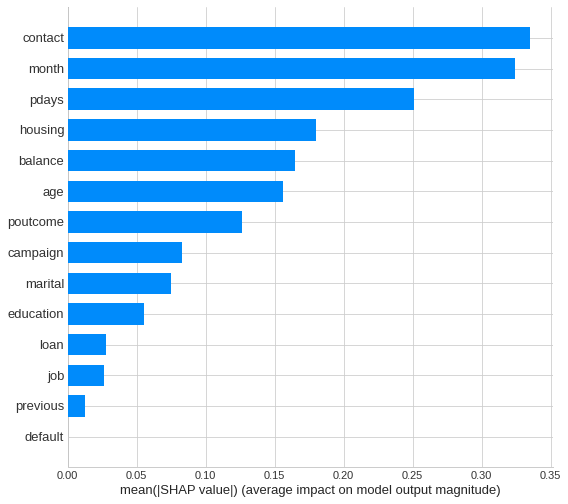

In [ ]:
shap.summary_plot(shap_xgb4,X_train_processed,plot_type="bar")

각 feature가 예측값에 미치는 절대 영향도를 확인할 수 있다.

- contact>month>pdays>housing


pdays : 이전 캠페인으로부터 고객이 마지막 연락한 이후로 얼마나 지났는지

SHAP Summary plot을 통해 예측값에 대한 feature 영향도 자세히 볼 수 있음

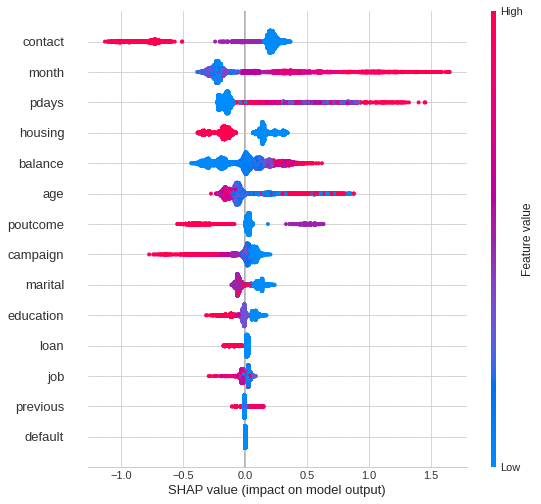

In [ ]:
shap.summary_plot(shap_xgb4,X_train_processed)

contact>month>pdays>housing(위의 barplot 결과)

SHAP Summary plot을 통해 예측값에 대한 feature 영향도 자세히 볼 수 있음
- 가설 1) 직업과 잔액이 예금예치승락에 가장 중요한 영향을 끼칠 것이다.
-> 그렇지 않다.가장 중요한 영향은 아니다. 잔액의 경우 어느정도 그렇다고 할 수 있지만 직업은 그렇지 않다. 
- contact 은 값이 클수록 예측에 부정적인 영향, 값이 작을 수록 긍정정인 영향을 끼친다고 
볼 수 있음. contact은 고객과 접촉한 수단을 의미함, 따라서 접촉수단에 따라 예측값에 영향이 주는 것을 보아 수단에 따라 고객의 예금여부가 달려 있을 것으로 추측해볼 수 있음 

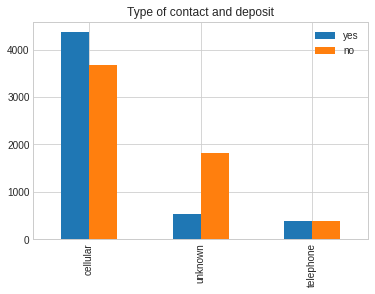

- month 는 값이 클수록 긍정적인 영향을 끼침 

- pdays 는 값이 클수록 긍정적인 영향을 끼치기도 하나 값이 작아도 긍정적인 영향을 끼친다. pdays는 이전 마케팅캠페인으로부터 고객과의 마지막 접촉이후 얼마나 지났는지를 의미함.

- housing 은 집대출로, 값이 작으면 예측값에 긍정적인 영향, 값이 크면 예측값에 부정적인 영향으로 집대출이 없어야 예금예치를 할 경우가 크다고 볼 수 있다. 




In [ ]:
row=X_test.iloc[[2]]
row

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome
7071,47,blue-collar,married,secondary,0,125,0,0,cellular,jul,2,-1,0,unknown


In [ ]:
#shap 그래프로 각 고객에 대한 예측.

import xgboost
import shap

explainer = shap.TreeExplainer(xgb4)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row,
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

In [ ]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

In [ ]:
print('deposit 예금 예치에 대한 Positive 요인 Top 3 입니다:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} : {feature_value}')

print('\n')
print('Negative 요인 Top 3 입니다:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')

deposit 예금 예치에 대한 Positive 요인 Top 3 입니다:
1. contact : cellular
2. housing : 0
3. campaign : 2


Negative 요인 Top 3 입니다:
1. month : jul
2. pdays : -1
3. balance : 125


##결론##


####가설####
- 예금 예치승락에 가장 중요한 영향을 끼치는 요소는 무엇일까?

1. 직업과 잔액이 예금예치승락에 가장 중요한 영향을 끼칠 것이다. 
2. 지난번 마케팅 캠페인의 결과는 이번 마케팅 캠페인에 가장 큰 영향을 끼칠 것이다. 

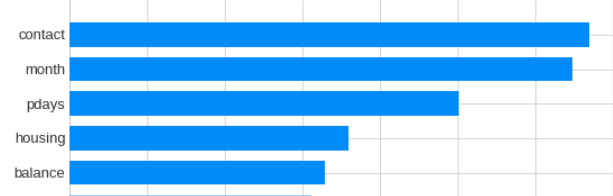

예측값(예금예치)에 영향을 끼치는 top 5 는 contact,month,pdays,housing,balance이다.

따라서 가설 1,2 번은 맞지 않다. 

가설 1번의 경우 잔액이 예측값 영향에 끼치긴 하지만 가장 중요한 영향이라고
보기에는 어렵다.



목표 1) 예금 예치여부를 잘 분류하는 모델 생성

-> xgboost 모델 생성 xgb4

목표 2 ) 예금 예치에 가장 중요한 영향을 끼치는 요소 파악=> 다음 마케팅 캠페인 계획?

 contact는 예측값에 가장 중요한 영향을 끼치나 접촉수단에 따라 예측값에 영향이 주는 것을 보아 수단에 따라 고객의 예금여부가 달려 있음.
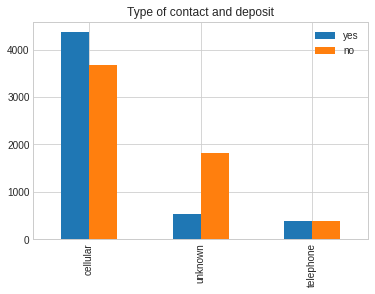

휴대폰이 가장 많은 영향을 끼치나 unknown이 전화보다 많아서 추후 정확한 데이터 수집이 필요해보임 -> 모델 성능 영향

pdays는 이전 마케팅캠페인으로부터 고객과의 마지막 접촉이후 얼마나 지났는지를 의미함. 

값이 클수록 긍정적인 영향을 끼치기도 하나 값이 작아도 긍정적인 영향을 끼친다. 고객과의 적당한 유지관계가 필요해보임

housing 은 집대출로, 값이 작으면 예측값에 긍정적인 영향, 값이 크면 예측값에 부정적인 영향으로 대출이 없어야 예금예치를 할 경우가 크다고 볼 수 있다.
하지만 예측에 영향을 끼치는 정도는 작음 
